# Problem Statement :
The World Bank EdStats All Indicator Query 
holds over 4,000 internationally comparable indicators 
that describe education access, progression, completion, literacy, teachers, population, and expenditures.

The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>


##  Explore and analyze the data to identify variation of indicators across the globe, 

which countries are more alike and different. 

Feel free to add more extensive analyses and details.

In [ ]:
# Import statements

import numpy as np
import pandas as pd

pd.set_option('display.max_rows'   , 1000 )
pd.set_option('display.max_columns', 1000 )
np.seterr(divide='print', over='warn', under='warn', invalid='print')

import os
import json
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

!pip install heatmapz
from heatmap import heatmap 

!pip install plotly
import plotly.express as px

import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive/')

datadir = r'/content/drive/MyDrive/AlmaBetter/Capstone1_EDA/Data_Store/'

world_json = json.load(open( datadir+"countries.geo.json","r"))

Mounted at /content/drive/


---
---

## Filename : EdStatsCountry.csv
## File description :

this file contains __this__ kind of data 

and is useful for understanding about __this__ aspect of the data set

In [ ]:
df_country = pd.read_csv(datadir + 'EdStatsCountry.csv')

print('DataFrame Shape :' , df_country.shape)

#display(df_country.describe().transpose())

#display(df_country.info())

pp.pprint(list(df_country.columns.values))

DataFrame Shape : (241, 32)
[   'Country Code',
    'Short Name',
    'Table Name',
    'Long Name',
    '2-alpha code',
    'Currency Unit',
    'Special Notes',
    'Region',
    'Income Group',
    'WB-2 code',
    'National accounts base year',
    'National accounts reference year',
    'SNA price valuation',
    'Lending category',
    'Other groups',
    'System of National Accounts',
    'Alternative conversion factor',
    'PPP survey year',
    'Balance of Payments Manual in use',
    'External debt Reporting status',
    'System of trade',
    'Government Accounting concept',
    'IMF data dissemination standard',
    'Latest population census',
    'Latest household survey',
    'Source of most recent Income and expenditure data',
    'Vital registration complete',
    'Latest agricultural census',
    'Latest industrial data',
    'Latest trade data',
    'Latest water withdrawal data',
    'Unnamed: 31']


In [ ]:
df_country = df_country[['Country Code', 'Short Name', 'Long Name', 'Region' , 'Income Group' ]]
df_country.head(5)

,Country Code,Short Name,Long Name,Region,Income Group
0,ABW,Aruba,Aruba,Latin America & Caribbean,High income: nonOECD
1,AFG,Afghanistan,Islamic State of Afghanistan,South Asia,Low income
2,AGO,Angola,People's Republic of Angola,Sub-Saharan Africa,Upper middle income
3,ALB,Albania,Republic of Albania,Europe & Central Asia,Upper middle income
4,AND,Andorra,Principality of Andorra,Europe & Central Asia,High income: nonOECD


In [ ]:
# we need a list of countries available in DataSet 
# for deriving subsets later for analysing specific countries

country_code_list = list(df_country['Country Code'])
#country_code_list

Below : Utility function for geting the full name of a country name from its Country-Code

In [ ]:
macro_geographic = [ "WLD","OED","EMU","EUU","ECA","ECS","ARB","MEA","MNA","SSA","SSF","SAS","EAP","EAS" ]
macro_economic   = [ "HIC","UMC","MIC","LIC","LMC","LMY","HPC","LDC" ]

europe15 = [ "RUS","AUT","BEL","FIN","FRA","DEU","GRC","ITA","NLD","PRT","ESP","DNK","NOR","POL","SWE","CHE","GBR" ]
BRICS    = [ 'BRA','RUS','IND','CHN','ZAF' ]

country_code_list_shorter = ["AFG","ARB","ARE","ARG","AUS","AUT","BEL","BGD","BHR","BRA","CAF","ZMB","ZWE",
                             "CAN","CHE","CHL","CHN","COL","CUB","DEU","DNK","EGY","EMU","ESP","ETH","EUU",
                             "FIN","FRA","GBR","GRC","GRL","HIC","HUN","IDN","IND","IRL","IRN","IRQ","ISL",
                             "ISR","ITA","JAM","JOR","JPN","KOR","KWT","LIE","LKA","MAR","MDG","MEX","MKD",
                             "MYS","NAC","NLD","NPL","NZL","OMN","PAK","PAN","PHL","POL","PRK","PRT","QAT",
                             "RUS","SAU","SGP","SWE","THA","TUR","UKR","USA","VEN","VNM","WLD","YEM","ZAF"]

Utility function to get name of country from cuntry code

In [ ]:
def get_country_name( country_code ):
    return df_country['Short Name'][ df_country['Country Code'] == country_code ].values[0]

get_country_name('AFG')

'Afghanistan'

In [ ]:
geographic_code_name_index = {
"EAS" : "East Asia & Pacific",
"ECS" : "Europe & Central Asia",
"LCN" : "Latin America & Caribbean",
"MEA" : "Middle East & North Africa",
"NAC" : "North America",
"SAS" : "South Asia",
"SSF" : "Sub-Saharan Africa" }

economic_code_name_index = {
"HIC" : "High income: OECD",
"HICN" : "High income: nonOECD",
"LIC" : "Low income",
"LMC" : "Lower middle income",
"UMC" : "Upper middle income" }

In [ ]:
def get_countries_in_subset( geographic_code , economic_code ):
    
    geographic_name = geographic_code_name_index[geographic_code]
    economic_name   = economic_code_name_index  [economic_code  ]

    #print( geographic_name ,  economic_name)

    geographic_subset = set(df_country [( df_country ['Region']       == geographic_name )]['Country Code'].values)
    economic_subset   = set(df_country [( df_country ['Income Group'] == economic_name   )]['Country Code'].values)
    
    #print( len(geographic_subset) ,  len(economic_subset) ) 
    
    return list(geographic_subset & economic_subset)
    

In [ ]:
country_count = []

for geographic_grp in geographic_code_name_index.keys() :
    for economic_grp in economic_code_name_index.keys() :
        country_count.append([ geographic_code_name_index[geographic_grp] , economic_code_name_index[economic_grp] , len(get_countries_in_subset( geographic_code = geographic_grp , economic_code = economic_grp )) ])
        
country_count = pd.DataFrame( country_count , columns = [ 'Geographic Group' , 'Economic Group' , 'Country Count'] )

#country_count.head(10)

country_count_pivot = country_count.pivot(index = 'Geographic Group', columns = 'Economic Group', values = 'Country Count' )

country_count_pivot


Economic Group,High income: OECD,High income: nonOECD,Low income,Lower middle income,Upper middle income
Geographic Group,,,,,
East Asia & Pacific,4,8,3,12,9
Europe & Central Asia,23,13,1,7,13
Latin America & Caribbean,1,14,1,7,18
Middle East & North Africa,1,7,0,6,7
North America,2,1,0,0,0
South Asia,0,0,3,4,1
Sub-Saharan Africa,0,1,26,14,7


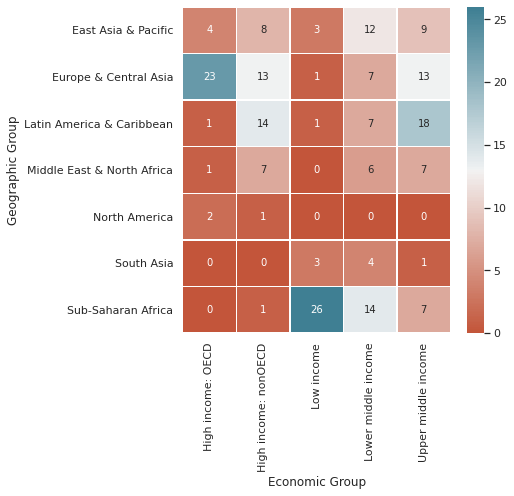

In [ ]:
f, ax = plt.subplots(figsize=(6,6) , sharey =True)
sb.heatmap( country_count_pivot , linewidths =0.5 , ax=ax, annot=True , cmap=sb.diverging_palette(20, 220 , n=200) )
plt.show()


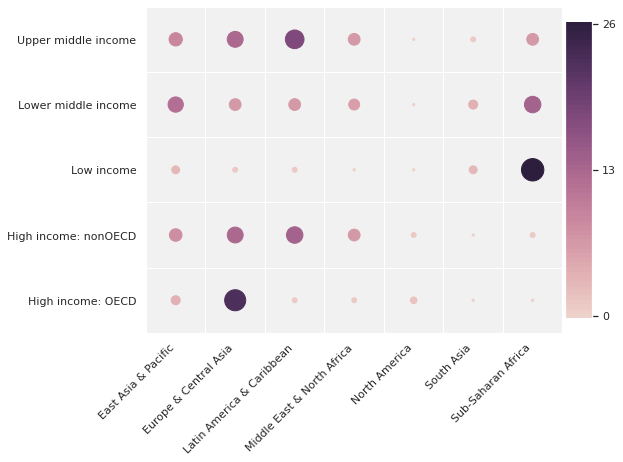

In [ ]:
plt.figure(figsize=(8,6))


heatmap(country_count['Geographic Group'] , 
        country_count['Economic Group']   , 
        size = country_count['Country Count'] ,
        color = country_count['Country Count'] ,
        # cmap=sb.diverging_palette(20, 220 , n=200),
        palette=sb.cubehelix_palette(64)[::] , # We'll use black->red palette
        marker ='o' )

---

## Filename : EdStatsSeries.csv
## File description :

this file contains __this__ kind of data 

and is useful for understanding about __this__ aspect of the data set

In [ ]:
df_series = pd.read_csv(datadir + 'EdStatsSeries.csv')

print('DataFrame Shape :' , df_series.shape)
print()

#display(df_series.describe().transpose())

#display(df_series.info())

list(df_series.columns.values)

DataFrame Shape : (3665, 21)



['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

## this distribution tells us about the composition of the data set
we have 4400+ indicators , this graph tells us 

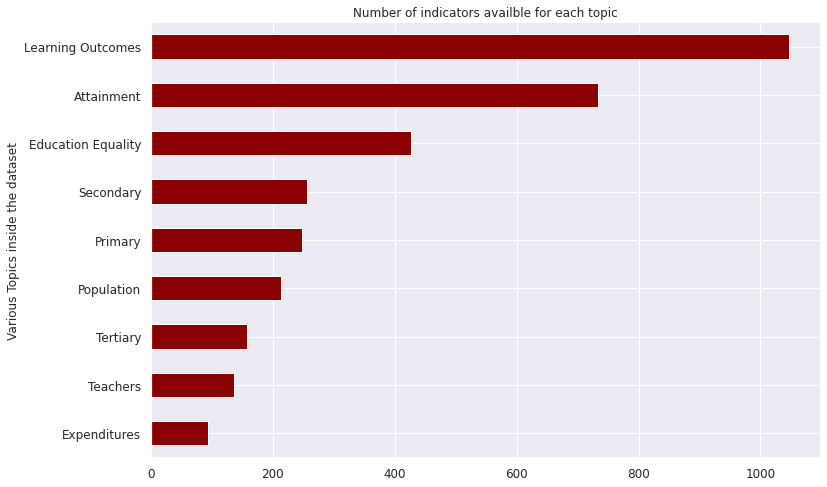

In [ ]:
df_series.Topic.value_counts()[:9].sort_values().plot.barh( figsize = (12,8) , rot = 0, 
                                                           title = 'Number of indicators availble for each topic' , 
                                                           color='darkred', fontsize = 12,
                                                           ylabel = 'Number of indicators avaible in data set for given Topic',
                                                           xlabel = 'Various Topics inside the dataset')

as we can see most of the indicators that are avaible to us for analysis in this data set are of the topic Learning outcomes 



In [ ]:
def get_indicator_code_details ( indicator_code ):
    indicator_dict = df_series[ df_series['Series Code'] == indicator_code ].to_dict( orient = 'list' )
    
    indicator_dict = { key:val for key, val in indicator_dict.items() if type(val[0]) == str }

    return indicator_dict
    
get_indicator_code_details('BAR.NOED.15UP.FE.ZS')

{'Indicator Name': ['Barro-Lee: Percentage of female population age 15+ with no education'],
 'Long definition': ['Percentage of female population age 15+ with no education'],
 'Series Code': ['BAR.NOED.15UP.FE.ZS'],
 'Short definition': ['Percentage of female population age 15+ with no education'],
 'Source': ['Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/'],
 'Topic': ['Attainment']}

---
---

## Filename : EdStatsData.csv
## File description :

this file contains __this__ kind of data 

and is useful for understanding about __this__ aspect of the data set

In [ ]:
df_main_data = pd.read_csv( datadir + 'EdStatsData.csv' )

print('DataFrame Shape :' , df_main_data.shape)

#display(df_main_data.describe().transpose())

#display(df_main_data.info())

DataFrame Shape : (886930, 70)


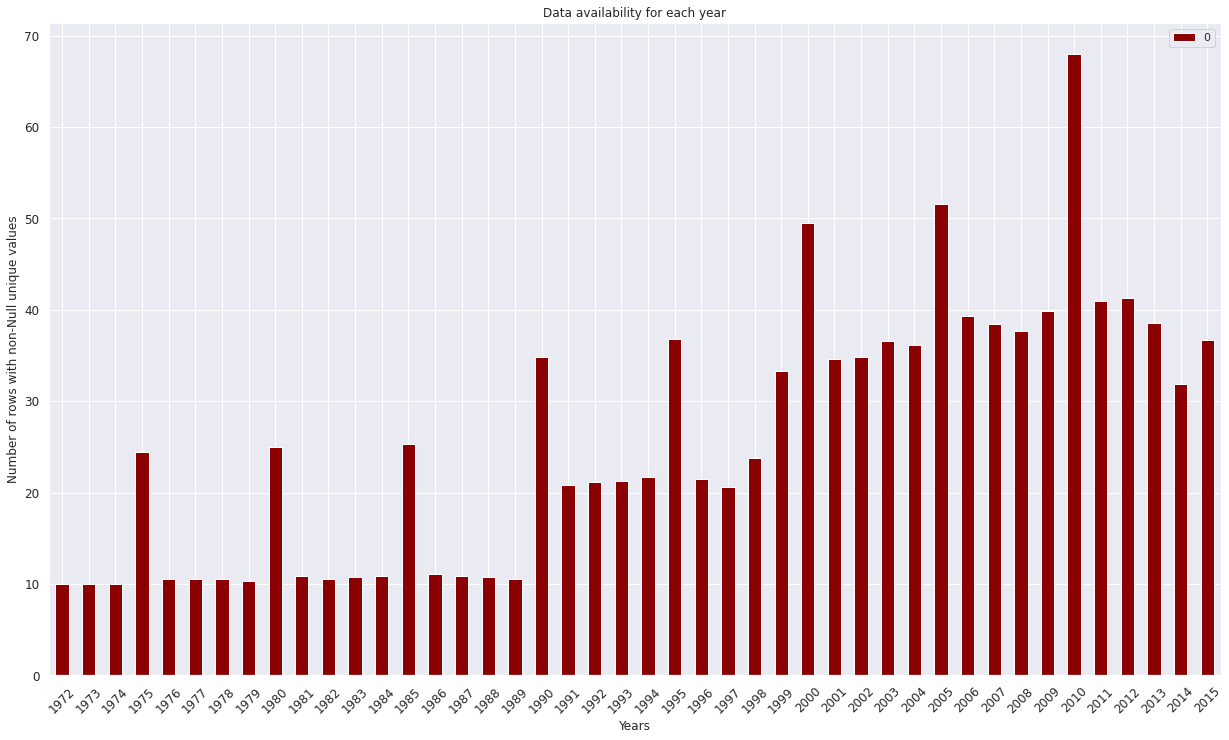

In [ ]:
data_availability = pd.DataFrame(df_main_data.count()[2:] / len(df_main_data) )[2:] * 100
data_availability.plot.bar(figsize=(21,12) , rot = 45 , title = 'Data availability for each year' , 
                    color='darkred', fontsize = 12,
                    ylabel = 'Percentage of non-Null unique values in each row',
                    xlabel = 'Years')

#data_availability

this is a plot of how many rows have data for each column in the dataframe

this tells us that how many inidictor_series rows are populated for each year

here we can see that in our data ,

there is a spike every 5 years , ie.: near years lik 1985,1990,1995,2000

also there is a lot of future projection data that is not useful in our analysis as it is doesnot hold real iformation , and only contains predictions 

so we are discarding data after 2015 uptil 2100

## Dropping all the rows which have all null values in years columns results in 40% of the original dataset in terms of number of rows.

In [ ]:
df_main_data.drop(['Country Name' , 'Indicator Name' , 'Unnamed: 69'], axis = 1, inplace = True) 
#df_main_data.head()

df_main_data.drop(["2020","2025","2030","2035","2040","2045","2050","2055","2060",
                   "2065","2070","2075","2080","2085","2090","2095","2100",
                   "2016","2017"], axis = 1, inplace = True) 

df_main_data = df_main_data.dropna(thresh = 3)

#df_main_data.set_index(['Country Code' , 'Indicator Code'])
#df_main_data.dropna(how = 'all')

display(df_main_data.shape)

df_main_data.head()

(356695, 48)

,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,ARB,SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN
5,ARB,SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN
6,ARB,UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN
7,ARB,SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,71.499512,72.162064,72.717690,73.619972,74.379982,74.507133,74.662628,74.981827,75.972542,76.255493,76.875053,77.703857,78.039368,78.021889,77.933853,78.187492,76.541100,76.697418,78.028130,77.611900,78.817490,79.372040,79.593536,80.287529,81.051369,82.315048,83.324059,83.832230,84.604393,85.380287,85.635078,85.866692,86.444138,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN
12,ARB,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,58.701626,58.876965,59.452522,62.776375,62.559566,62.594330,62.447292,63.409138,65.837379,64.613091,65.926895,66.775635,66.447350,66.931831,67.080444,67.508705,67.653282,67.444687,68.652267,69.208015,68.651680,69.611557,66.867638,68.321686,70.737579,73.594200,74.976158,75.328583,76.428513,76.131767,75.222557,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN


In [ ]:
year_columns = list( set( list(df_main_data.columns.values)) - set([ 'Country Code' , 'Indicator Code' ])  )
year_columns = sorted(year_columns)
#year_columns

Explain this graph below properly in comment

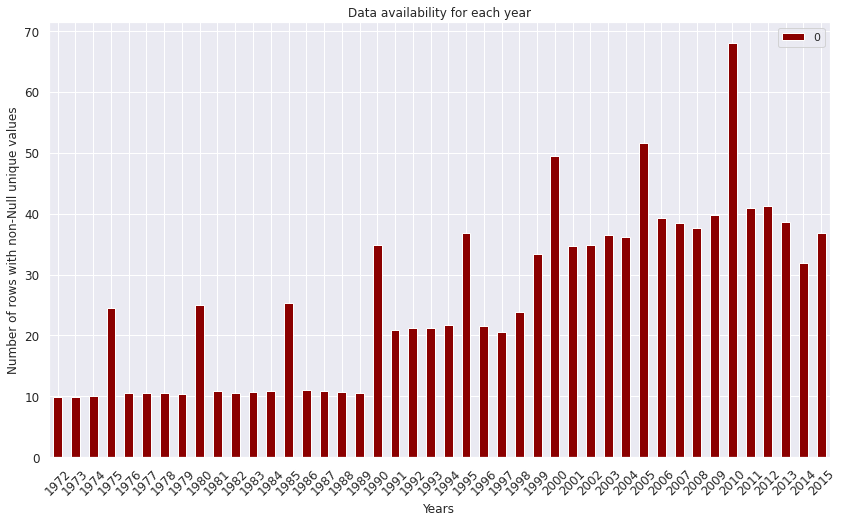

In [ ]:
data_availability = pd.DataFrame(df_main_data.count()[2:] / len(df_main_data) )[2:] * 100
data_availability.plot.bar(figsize=(14,8) , rot = 45 , title = 'Data availability for each year' , 
                    color='darkred', fontsize = 12,
                    ylabel = 'Percentage of non-Null unique values in each row',
                    xlabel = 'Years')

# Compartive analysis
## of absolute values of indicators

In [ ]:
def get_pivot_similiarity( df , country1 , country2 ):

    subset = df_main_data[ ( df_main_data['Country Code'] == country1 ) | ( df_main_data['Country Code'] == country2 ) ].dropna(how='all', axis= 0 , subset= year_columns ) 
    
    pivot_similiarity_list =[]
        
    for year in year_columns :
        
        subset_pivot = subset.pivot(index = 'Indicator Code', columns = 'Country Code', values = year ).dropna()
        
        subset_pivot['ratio'] = (subset_pivot[country1] - subset_pivot[country2]) / (subset_pivot[country1] + subset_pivot[country2])
        
        subset_pivot = subset_pivot.replace([np.inf, -np.inf], np.nan).dropna()

        data_count = len(subset_pivot)
        
        ratio = subset_pivot['ratio'].abs().mean()
        
        pivot_similiarity_list.append([year , ratio , data_count ])
        
    return pd.DataFrame(pivot_similiarity_list , columns = [ 'Year' , 'Similiarity' , 'DataPointCount'])

# Report Generation Code

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
def generate_report( country_list , indicator , data_subset = df_main_data , year = 2013 , pie = True , similiarity = False , mode = '1') :
    
    #pp.pprint(get_indicator_code_details ( indicator ))
    
    data_subset = data_subset.loc[data_subset['Indicator Code'].isin( [indicator]  )]
    data_subset = data_subset.loc[data_subset['Country Code']  .isin( country_list )]

    data_subset = data_subset.dropna(thresh = 3)
    
    #print(data_subset.shape)
    #display(data_subset.head(5))


    data_subset_5yr = pd.DataFrame()
    
    data_subset_5yr ['Country Code']  = data_subset['Country Code']
    data_subset_5yr.set_index('Country Code')
    data_subset_5yr ['1970-1975']  = data_subset[['1970','1971','1972','1973','1974','1975']].mean(axis=1)
    data_subset_5yr ['1976-1980']  = data_subset[['1976','1977','1978','1979','1980']].mean(axis=1)
    data_subset_5yr ['1981-1985']  = data_subset[['1981','1982','1983','1984','1985']].mean(axis=1)
    data_subset_5yr ['1986-1990']  = data_subset[['1986','1987','1988','1989','1990']].mean(axis=1)
    data_subset_5yr ['1991-1995']  = data_subset[['1991','1992','1993','1994','1995']].mean(axis=1)
    data_subset_5yr ['1996-2000']  = data_subset[['1996','1997','1998','1999','2000']].mean(axis =1)
    data_subset_5yr ['2001-2005']  = data_subset[['2001','2002','2003','2004','2005']].mean(axis =1)
    data_subset_5yr ['2006-2010']  = data_subset[['2006','2007','2008','2009','2010']].mean(axis =1)
    data_subset_5yr ['2011-2015']  = data_subset[['2011','2012','2013','2014','2015']].mean(axis =1)


    if mode == '1' :
      data_subset_final = data_subset
      data_subset_transpose = data_subset_final.set_index(['Indicator Code' , 'Country Code']).transpose()
      data_subset_transpose = data_subset_transpose [( indicator , )].dropna(how='all')
  
    elif mode =='5' :
      data_subset_final = data_subset_5yr
      data_subset_transpose = data_subset_final.set_index(['Country Code']).transpose()
      # data_subset_transpose = data_subset_final.transpose()



    #data_subset_transpose.plot(legend = True , figsize = (13,8) , title = get_indicator_code_details( indicator )['Indicator Name'][0] , linewidth = 3 )
    data_subset_transpose.plot(legend = [ get_country_name(x) for x in data_subset_transpose.columns.values ] , 
                               figsize = (13,8) , title = get_indicator_code_details( indicator )['Indicator Name'][0] , linewidth = 3 )

    # sb.set()
    # sb.set_style("darkgrid")
 
    plt.legend(fontsize = 16)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel('Year',fontsize = 15)
    plt.ylabel(get_indicator_code_details( indicator )['Indicator Name'][0],fontsize = 15)
    plt.title(get_indicator_code_details( indicator )['Indicator Name'][0], fontsize = 25)


    ############
    if pie :
        try : 
            fig = plt.figure(figsize = (12,8))
            #plt.figure(figsize=(8,6))
            plt.legend(fontsize = 16)
            plt.title(get_indicator_code_details( indicator )['Indicator Name'][0] + ' for ' + str(year) , fontsize = 25)

            plt.pie(data_subset[str(year)], labels = data_subset['Country Code'],
                    autopct='%1.1f%%', 
                    shadow=True , startangle=140)
            plt.axis('equal')
            plt.show()
        except:
          None
    

    ############
    if similiarity:

        country12_similiarity_list =[]

        for country1 in country_list :
            #print(country1)

            for country2 in country_list :

                correlations = get_pivot_similiarity( df = data_subset , country1 = country1 , country2 = country2 )

                final_data_count  = correlations['DataPointCount'].sum()

                if final_data_count >= 1 :

                    correlations['WeightedProduct'] = correlations.Similiarity * correlations.DataPointCount
                    final_similiarty = correlations['WeightedProduct'].sum() / final_data_count

                    country12_similiarity_list.append( [ get_country_name(country1) , get_country_name(country2) , final_similiarty , final_data_count ] )

        
        
        country_similiarty = pd.DataFrame( country12_similiarity_list , columns = [ 'Country1' , 'Country2' , 'Similiarity' , 'Data Count' ] )

        country_similiarty_pivot = country_similiarty.pivot(index = 'Country1', columns = 'Country2', values = 'Similiarity' )#.dropna()
        
        #display(country_similiarty_pivot)
        
        
        #f, ax = plt.subplots(figsize=(10,10) , sharey =True)
        #sb.heatmap( country_similiarty_pivot , linewidths =0.5 , ax=ax, annot=True , cmap=sb.diverging_palette(220, 20 , n=200) )
        #plt.show()

        print('Similiarity of counries for this indicator')

        plt.figure(figsize=(8,6))
        heatmap(country_similiarty['Country1'] , 
                country_similiarty['Country2'] , 
                color = 1-country_similiarty['Similiarity'] ,
                size  = 1-country_similiarty['Similiarity'] ,
                marker ='o')
    


    return data_subset , data_subset_5yr
    

## World GRAPH

In [ ]:
temp_df = data_subset[data_subset['Indicator Code'] == indicator]
#temp_df['Scale'] = np.log10(temp_df[time_period])
fig = px.choropleth_mapbox(temp_df,
                geojson=world_json, 
                locations='Country Name', 
                color = '2013',
                hover_name='Country Name',
                #hover_data=[time_period],
                color_continuous_scale=px.colors.diverging.BrBG,
                mapbox_style="open-street-map",
                zoom=1,
                opacity = 0.5,
                title = f"Plot for {temp_df['Indicator Code'].iloc[0]} for the time period {time_period} ")
fig.show()

# Case-Study : Analysis of BRICS Countries

this is the objective of this eploration subset 

we will be loooking into the foolowing indicators for these set countries 

description and definationof indicators looked at here

No handles with labels found to put in legend.


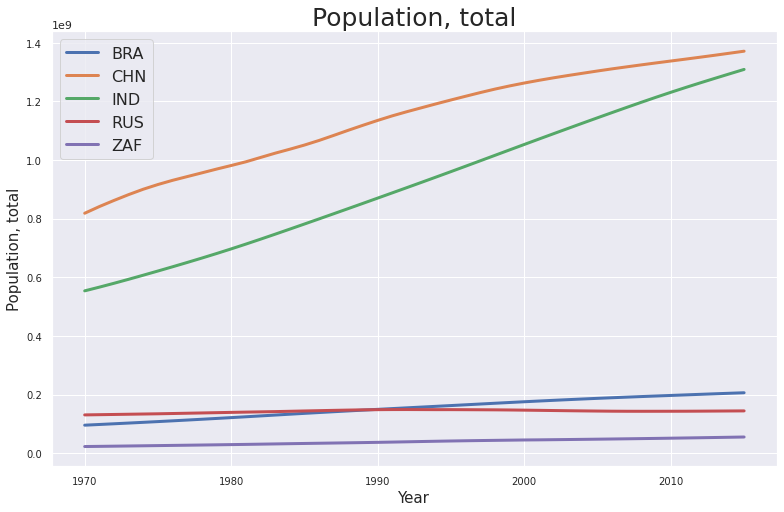

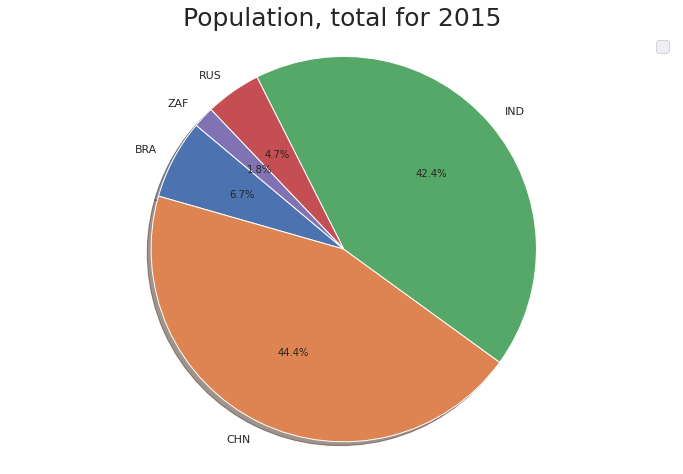

In [ ]:
 data_subset_BRICS , data_subset_5yr_BRICS = generate_report( country_list = BRICS , indicator = 'SP.POP.TOTL' , data_subset = df_main_data , year = 2015 , pie =True )

## As we can see, the population trends for India and China are the same, and for the rest three countries are the same.
The populations for Russia, SA, Brazil stayed relatively stable.
The populations of China and India showed growth over the years, with India's growth rate overtaking china's after 2000s.

# Case Study 
## How did the expenditure on education impacted the education level of different countries?

No handles with labels found to put in legend.


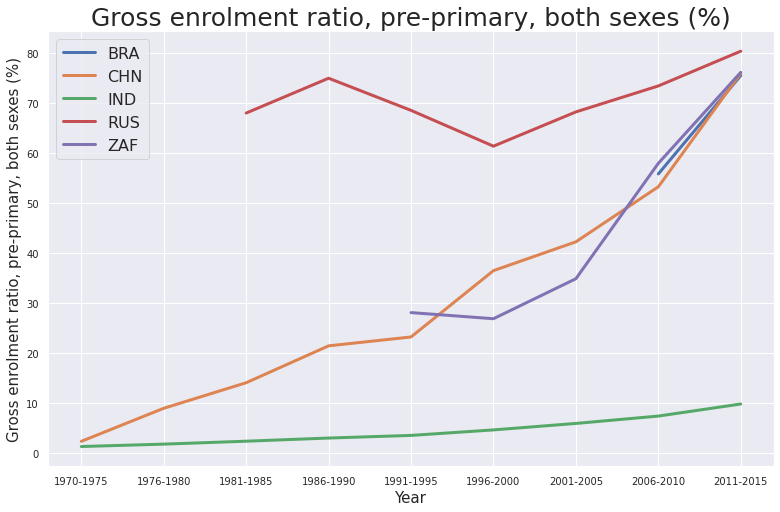

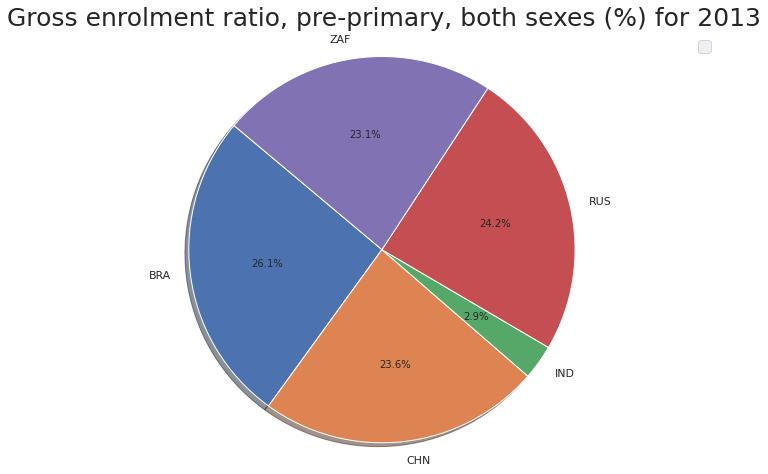

In [ ]:
data_subset_BRICS_2 , data_subset_5yr_BRICS_2 = generate_report( country_list = BRICS , indicator = 'SE.PRE.ENRR' , data_subset = df_main_data , year = 2013 , mode = '5' )

## As we can clearly see that India lags behind in pre-primary engagement of its population for education. India's pre-primary participation is at a staggering low of around 15% in 2015 as compared to other BRICS countires which is at above 80%.
If we just took the numbers and not the ratio, then this would have not been clear, due to India's large population.

In [ ]:
get_indicator_code_details('SE.TER.ENRR')

{'Indicator Name': ['Gross enrolment ratio, tertiary, both sexes (%)'],
 'Long definition': ['Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.'],
 'Series Code': ['SE.TER.ENRR'],
 'Source': ['UNESCO Institute for Statistics'],
 'Topic': ['Tertiary']}

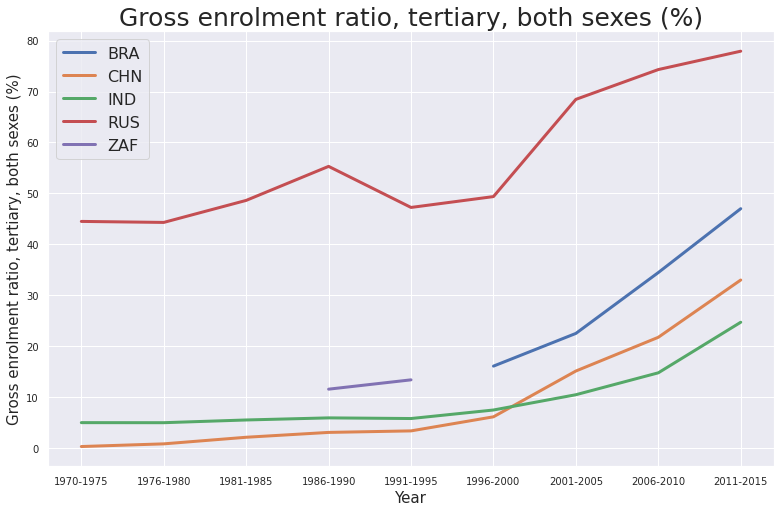

In [ ]:
data_subset_BRICS_3 , data_subset_5yr_BRICS_3 = generate_report( country_list = BRICS , indicator = 'SE.TER.ENRR' , data_subset = df_main_data , year = 2014 , pie = False , mode='5' )

## From this graph we can see that Russia has always had a greater percentage of its young popupaltion in the universities and colleges(around 80% of youth aged between 16 and 21 in 2015).
The number of young adults in colleges has been rising for almost every BRICS country throughout the last 4 decades.


## From comparing both the graphs one thing that has become evident is that only Russia was able to sustain its pre_primary enrollment ratio which is around 80% in both the cases(pre_primary and tertiary).
Countries like China and Brazil have a high pre-primary enrollment of around 80% and drop down to 40-50%in tertiary enrollments.
India is suprisingly higher at tertiary enrollments(28%) that its pre-primary(15%). This situation seems peculiar, further investigation might be helpful.

In [ ]:
data_subset_BRICS_4 , data_subset_5yr_BRICS_4 = generate_report( country_list = BRICS , indicator = 'SE.XPD.TERT.ZS' , data_subset = df_main_data , year = 2004 , mode='5' , pie=False );

In [ ]:
data_subset_BRICS_4

NameError: ignored

(array([10., 15., 20., 25., 30., 35., 40.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

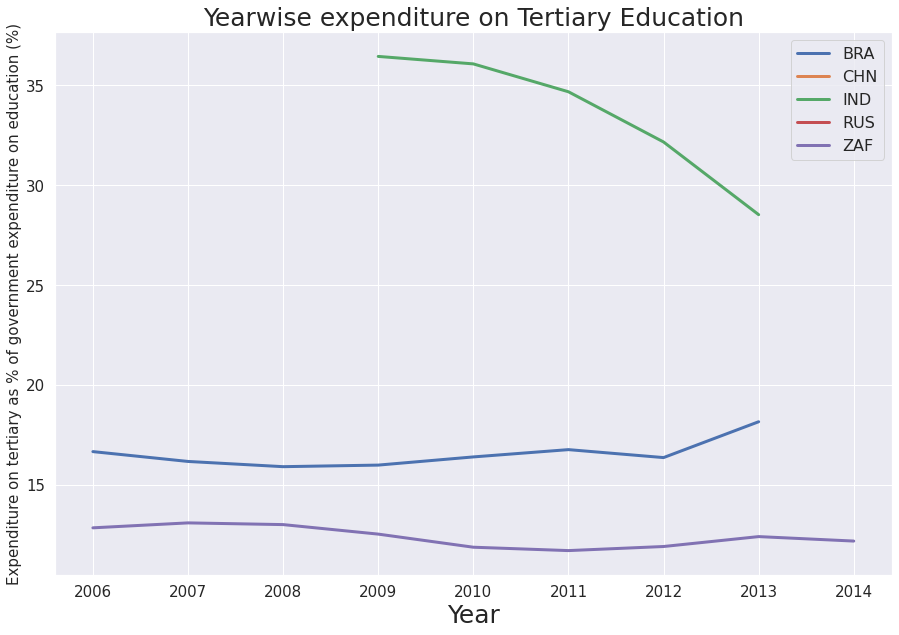

In [ ]:
#@title
plt.figure()
data_subset_BRICS_4.drop('Indicator Code' , axis = 1).set_index('Country Code').transpose()[-10:].plot(linewidth = 3 , figsize = (15,10))
plt.legend(fontsize = 16)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Expenditure on tertiary as % of government expenditure on education (%)',fontsize = 15)
plt.title('Yearwise expenditure on Tertiary Education', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## From this graph we can see that the expenditure on tertiary education (%) was highest in India. This could help explain as India the only country with higher Tertiary Engagement from pre-primary than other countries.
The opposite is true for USE BRAXZIL HERE ?????, its pre-primary engagement is highest, but tertiary is far lower, because it has very low expenditure in that area.

# Case-Study : 
## As Countries became more educated, their GDP rises , mortality rates fall .

this is the objective of this eploration subset 

we will be loooking into the foolowing indicators for these set countries 

description and definationof indicators looked at here

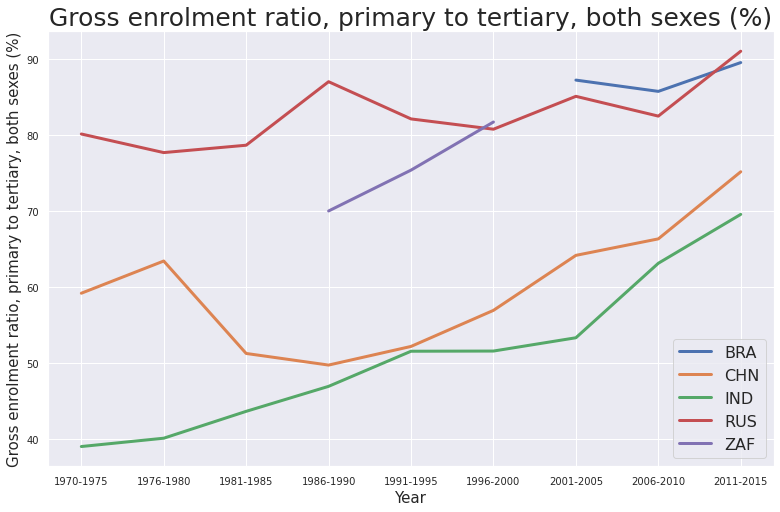

In [ ]:
data_subset_BRICS_5 , data_subset_5yr_BRICS_5 = generate_report( country_list = BRICS , indicator = 'SE.TOT.ENRR' , data_subset = df_main_data , year = 2014 , pie = False , mode='5' )

(array([ 55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

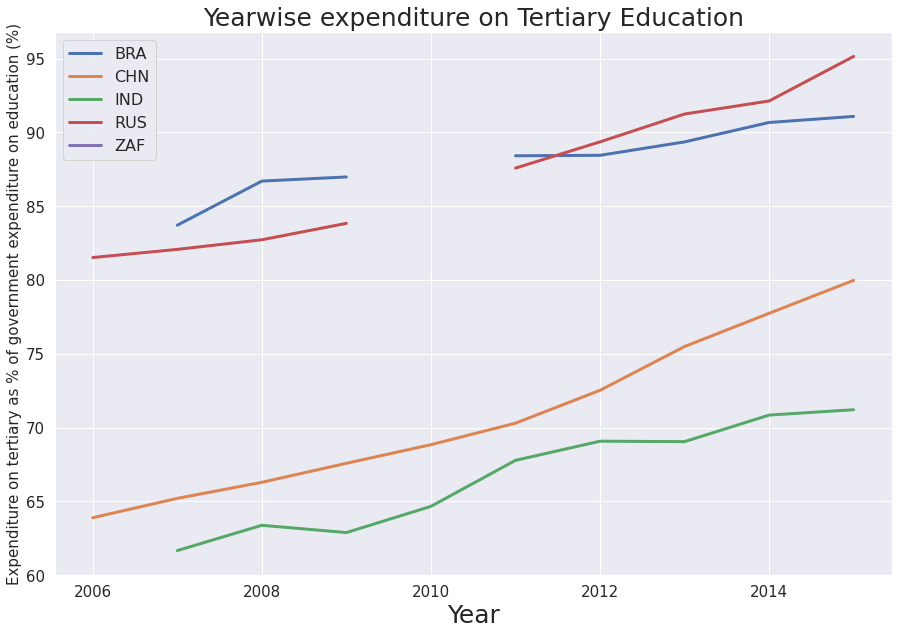

In [ ]:
plt.figure()
data_subset_BRICS_5.drop('Indicator Code' , axis = 1).set_index('Country Code').transpose()[-10:].plot(linewidth = 3 , figsize = (15,10))
plt.legend(fontsize = 16)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Expenditure on tertiary as % of government expenditure on education (%)',fontsize = 15)
plt.title('Yearwise expenditure on Tertiary Education', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

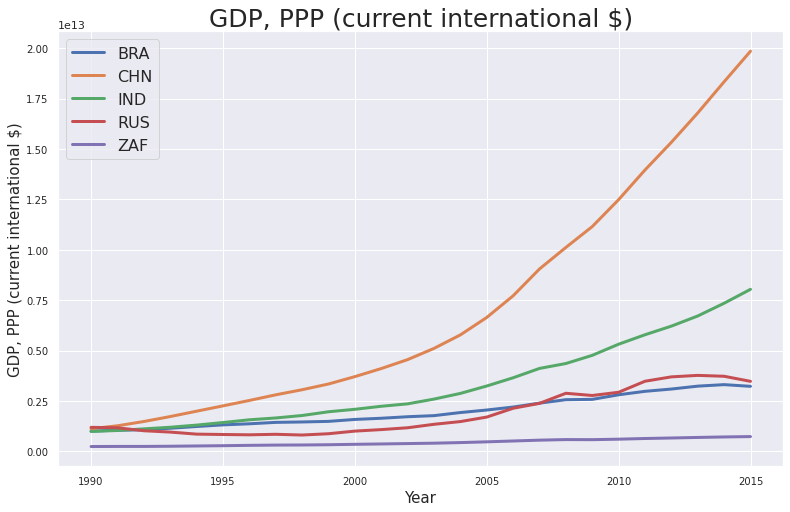

In [ ]:
data_subset_BRICS_6 , data_subset_5yr_BRICS_6 = generate_report( country_list = BRICS , indicator = 'NY.GDP.MKTP.PP.CD' , data_subset = df_main_data , year = 2014 , pie = False )

## GDP PPP is adjusted for prices of local goods and inflation in a country so it gives a more clear picture than the nominal GDP we see on TV all the time.
Like nominal GDP of CHina in 2015 is 11.7 trillion dollars and GDP PPP is 2 trillion dollars.
the same way, nominal GDP of INdia in 2015 is 2.1 trillion dollars and GDP PPP is 0.8 trillion dollars.

We can see both CHINA and INDIA have seen a non linear growth in GDP from 2000s.

No handles with labels found to put in legend.


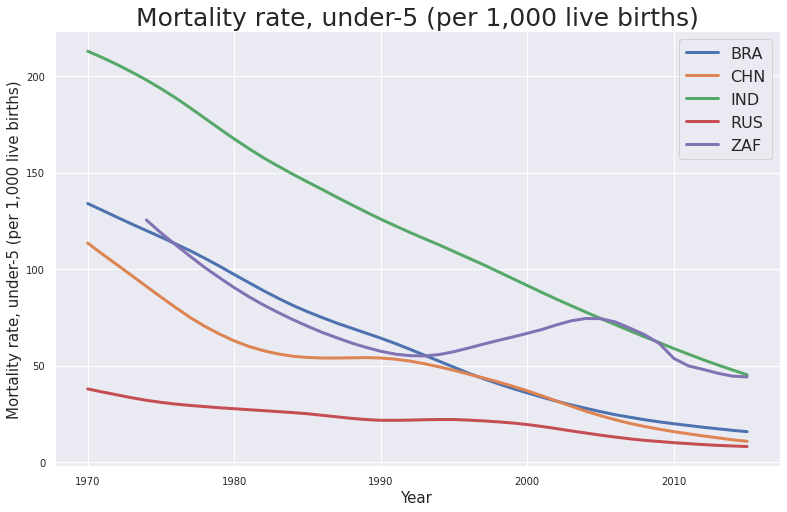

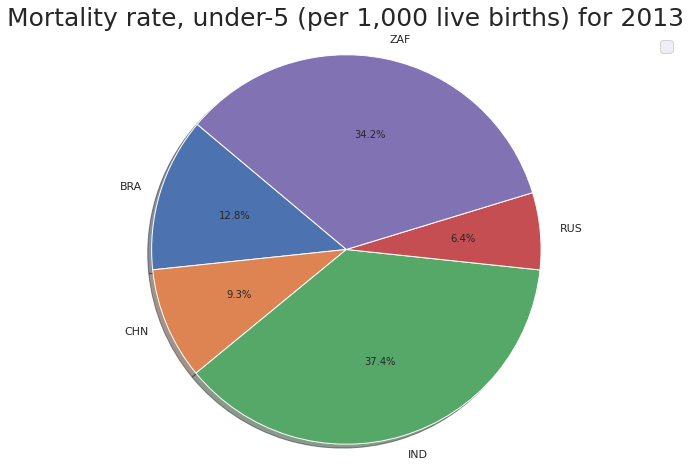

In [ ]:
data_subset_6 , data_subset_5yr_6 = generate_report( country_list = BRICS , indicator = 'SH.DYN.MORT' , data_subset = df_main_data , year = 2013 , pie = True)

## As countries become more educated, the mortality rates drop, and the rate of drop is higher in countries where more focus was laid on tertiary education for previous generations.

# RECONSIDER  Hypothesis: Population growth rate, is it increasing for India?

> Indented block



In [ ]:
x[x['Indicator Name']=='Population growth (annual %)'].groupby('Country Name').mean().T.plot(kind = 'bar')

NameError: ignored

**The 1990 to 2000 population increase was the HIGHEST.**

USA :While immigration played an important role in the population surges in all three areas, a large part of the increase also was due to domestic migration and rising birth rates

Even though pupulation is increasing for all countries ,
the pupoluation growth rate is steadily decreasing fro all of them , 
even in emerging economies of china and india

**due to aggressive one-child policy in china , the population growth rate has always stayed low in comparison to India and USA**

In [ ]:
GNI per capita, Atlas method (current US$)
NY.GNP.PCAP.CD

Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)



SyntaxError: ignored

# REMOVE Hypothesis : Is GDP linked to percenatage of educated people of a country?



In [ ]:
z = df[df['Indicator Code']=='NY.GNP.PCAP.CD'][df[df['Indicator Code']=='NY.GNP.PCAP.CD']['Country Code'].isin(list(df[df['Indicator Code']=='UIS.DR.2.GPV.T']['Country Code'].values))]


<Figure size 3600x2160 with 0 Axes>

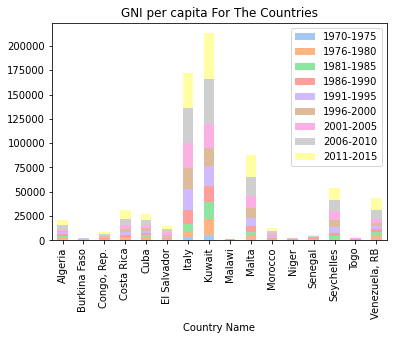

In [ ]:
plt.figure(figsize= (50,30))
z.plot(x='Country Name', kind='bar', stacked=True,
        title='GNI per capita For The Countries')

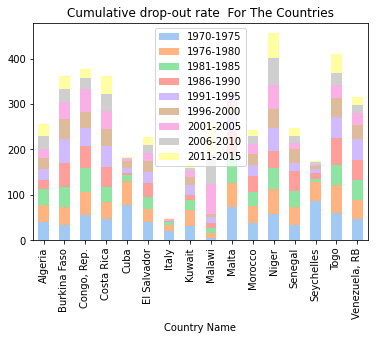

In [ ]:
cum = df[df['Indicator Code']=='UIS.DR.2.GPV.T'][df[df['Indicator Code']=='UIS.DR.2.GPV.T']['Country Code'].isin(list(z['Country Code'].unique()))]
cum.plot(x='Country Code', kind='bar', stacked=True,
        title='Cumulative drop-out rate  For The Countries')

# **Case Study:** Comparsion between american and Indian education

No handles with labels found to put in legend.


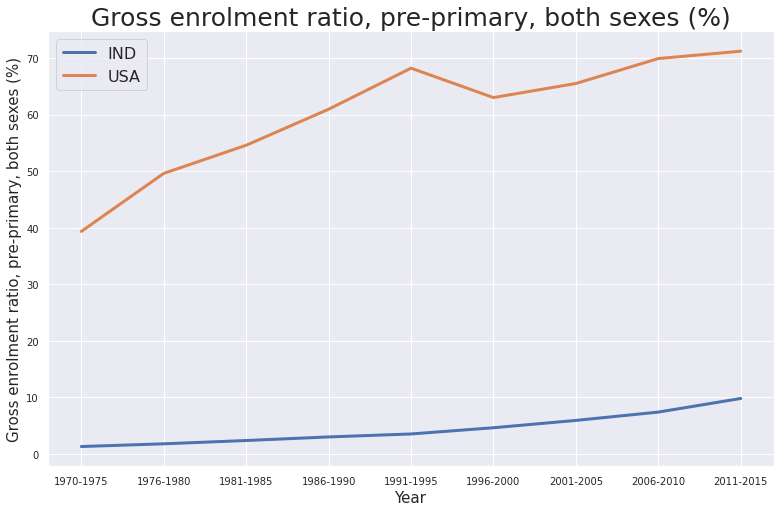

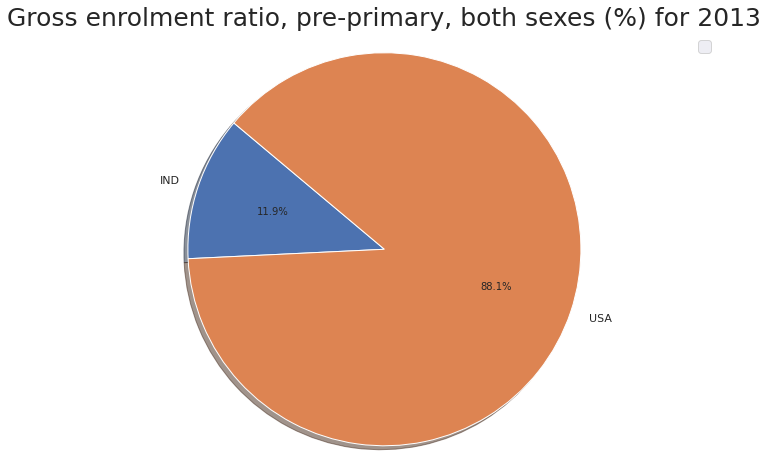

In [ ]:
data_subset_USAIND_EDU , data_subset_5yr_USAIND_EDU = generate_report( country_list = ['USA','IND'] , indicator = 'SE.PRE.ENRR' , data_subset = df_main_data , year = 2013 , mode ='5' )

In [ ]:
data_subset_5yr_USAIND_EDU

,Country Code,1970-1975,1976-1980,1981-1985,1986-1990,1991-1995,1996-2000,2001-2005,2006-2010,2011-2015
415460,IND,1.326983,1.807533,2.392466,3.022806,3.549468,4.649095,5.943586,7.414954,9.825234
847930,USA,39.348916,49.610777,54.584800,60.950288,68.213593,63.014850,65.502511,69.911362,71.213359


In [ ]:
x['Indicator Name'].unique()
plt.figure(figsize = (100,120))



x[ ((x['Indicator Name'] == 'Gross enrolment ratio, pre-primary, both sexes (%)'))].groupby('Country Name').mean().plot(kind ='bar')
plt.title('Enrolment in pre-primary education, both sexes (%)' )
plt.ylabel('Number of Enrolments')
plt.xlabel('Countries')


x[ ((x['Indicator Name'] == 'Gross enrolment ratio, primary and secondary, both sexes (%)'))].groupby('Country Name').mean().plot(kind ='bar')
plt.title('Enrolment in primary education, both sexes (%)' )
plt.ylabel('Number of Enrolments')
plt.xlabel('Countries')

NameError: ignored